In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore')

## Review

In [3]:
united = Table.read_table('united.csv')

In [4]:
united.sample(6,with_replacement = False).show()

Date,Flight Number,Destination,Delay
8/20/15,1699,ATL,12
7/18/15,1942,LAX,44
7/19/15,1616,SEA,0
6/3/15,1440,BOS,7
8/20/15,497,SLC,-3
8/4/15,1748,AUS,4


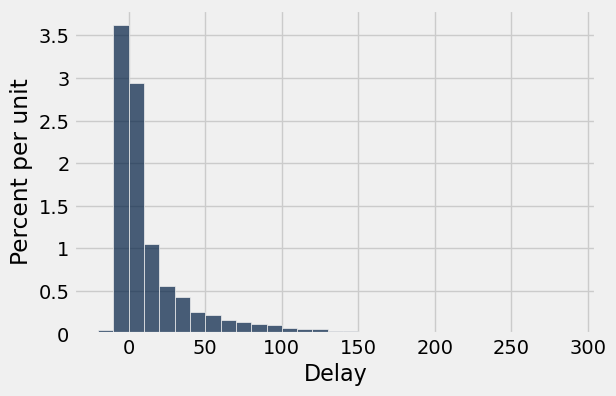

In [5]:
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [6]:
population_mean = np.average(united.column("Delay"))
population_sd = np.std(united.column("Delay"))
make_array(population_mean,population_sd)

array([ 16.65815552,  39.48019985])

In [7]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [8]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

## New material

### A Normal distribution is characterized by its mean

In [9]:
sample_means_400 = ten_thousand_sample_means(400)
sample_averages_average=np.average(sample_means_400)
sample_averages_average

16.655870500000002

Population Average: 16.6581555154


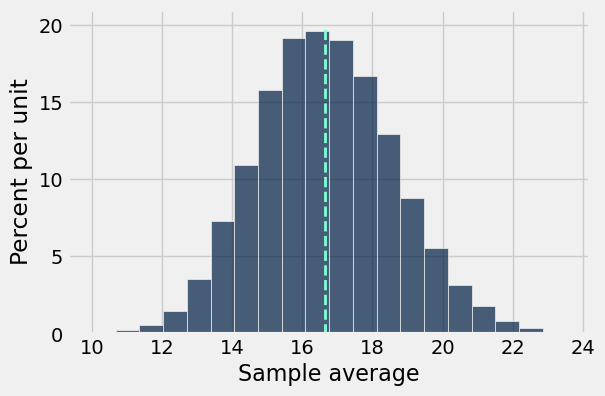

In [10]:
t=Table().with_column('Sample average', sample_means_400)
t.hist(bins=20)
plots.plot((population_mean, population_mean), (0, 0.2), color='aquamarine', lw=2,ls='--')
print('Population Average:', population_mean)

In [11]:
sample_means_900 = ten_thousand_sample_means(900)

In [12]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

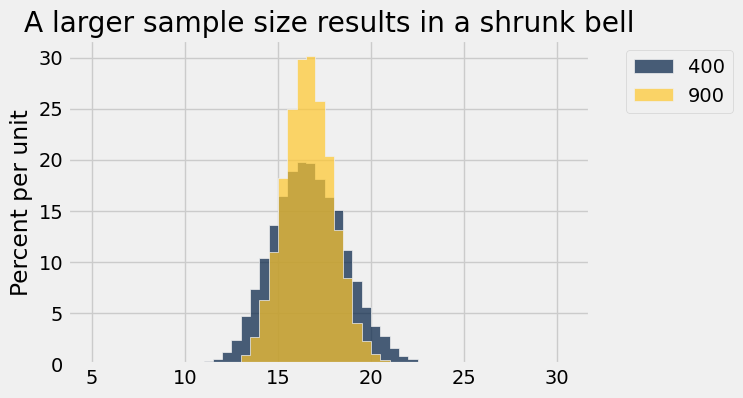

In [13]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('A larger sample size results in a shrunk bell');

### A Normal distribution is characterized by its standard deviation

In [21]:
def plot_sample_means(sample_size):
    """Empirical distribution of random sample means"""
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Population SD:", population_sd)
    print("SD of sample averages:", np.std(sample_means))
    print("Population SD / SD of sample averages:",population_sd/ np.std(sample_means))
    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Averages')

Population SD: 39.4801998516
SD of sample averages: 3.98567539822
Population SD / SD of sample averages: 9.90552313147


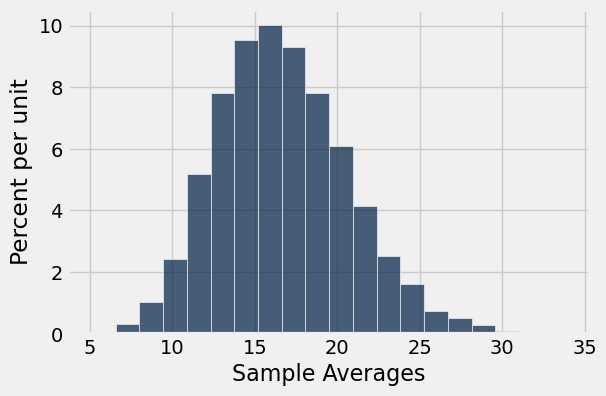

In [24]:
plot_sample_means(100)

Population SD: 39.4801998516
SD of sample averages: 1.95976256724
Population SD / SD of sample averages: 20.1453995048


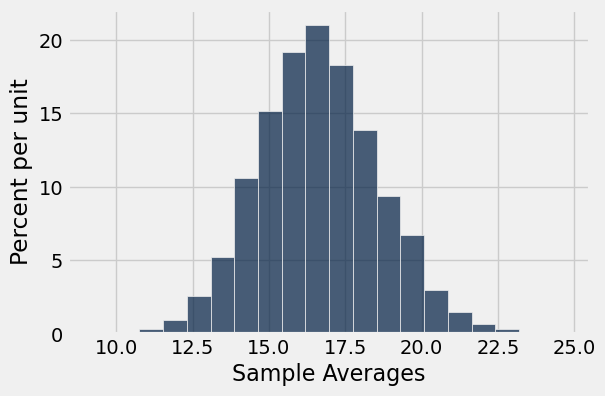

In [22]:
plot_sample_means(400)

Population SD: 39.4801998516
SD of sample averages: 1.56571079839
Population SD / SD of sample averages: 25.2155122723


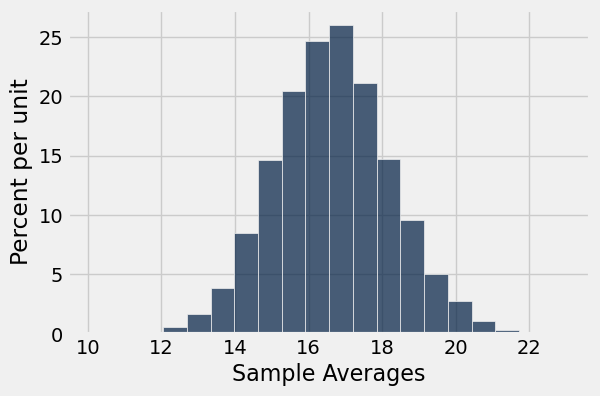

In [23]:
plot_sample_means(625)

Population SD: 39.4801998516
SD of sample averages: 1.58587620274
Population SD / SD of sample averages: 24.8948813177


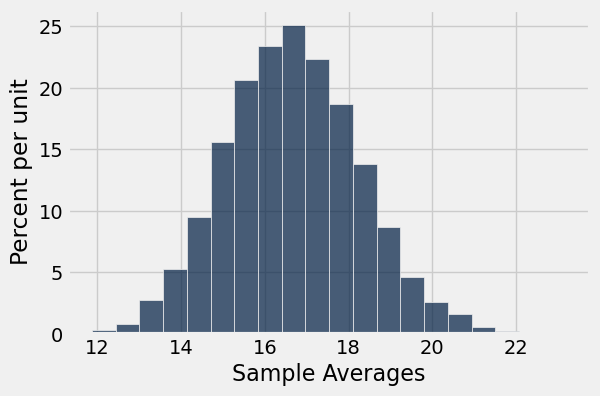

In [25]:
plot_sample_means(625)

#### The trend above we are seeing is...

$$\frac{\text{population SD}}{\text{SD of sample averages}} = \sqrt{\text{sample size}}$$

#### Now, let's solve for sample size...

$$\text{SD of sample averages} = \frac{\text{population SD}}{\sqrt{\text{sample size}}}$$

_______

The cell below will take a while to run.

In [30]:
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [31]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.86859,3.94802
150,3.22205,3.22354
200,2.79511,2.79167
250,2.47434,2.49695
300,2.29425,2.27939
350,2.13244,2.11031
400,1.97222,1.97401
450,1.84594,1.86111
500,1.75599,1.76561
550,1.70593,1.68344


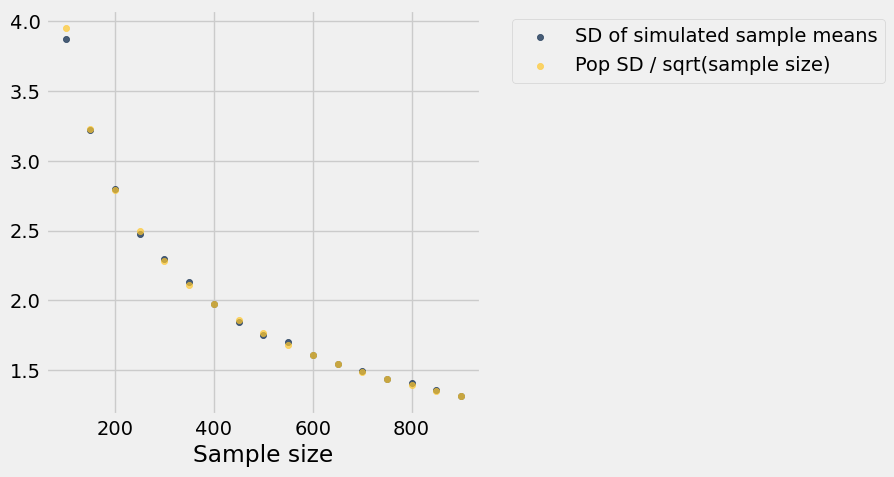

In [32]:
sd_table.scatter('Sample size')